satellite-aerosol-properties: Aerosol optical depth Sensor on the satellite: SLSTR on SENTINEL 3A
###Use Case Title: Identification of Pollution Hotspots; 
##User Question: Does the satellite AOD data resolution allow us to identify pollution hotspots such as megacities?

The "satellite-aerosol-properties" catalog provides global information on essential aerosol variables: aerosol optical depth (AOD) and fine-mode aerosol optical depth (fAOD) from 1995 to present, derived from satellite observations.

The SLSTR dataset is used in the following analysis to demonstrate how this catalog can capture the seasonal trends of AOD and fAOD. It also demonstrates how more aerosols on warmer days contribute to temperature increases on warmer days.ay

###Abstract: 
Near-surface aerosols can seriously endanger human health, in particular in "megacities". The aerosol optical depth (AOD) measures the extinction of solar radiation due to the aerosols and, in the boundary layer, is often adopted as an indicator of local air pollution. During the last decades, the Mediterranean has experienced a rapid growth in urbanization, vehicle use, and industrialization, which has been reflected in pollutant emissions to the atmosphere. The Eastern basin of the Mediterranean and the surrounding regions include two megacities: the Greater Cairo area (GCA) (>15 million inhabitants, Egypt) at the south edge of the basin and the Greater Istanbul area (GIA) (>12 million inhabitants, Turkey) at the northeast edge, as well as several large urban centers like the Greater Athens area (GAA) (>4 million inhabitants) in Greece. The region covers rural (inland Greek and Anatolian peninsulas), maritime (Crete and Cyprus islands), and desert (Anatolian plateau, north Africa, and the Middle East) sites. The health effects due to the interactions between pollutants and photochemical oxidants can be enhanced in the Mediterranean under high temperatures and humidity patterns. 
According to literature dating back to 1999, Cairo has experienced recurring air pollution incidents known as the "black cloud" phenomenon during the autumn season. These occurrences have been ascribed to two primary factors: the burning of agricultural waste and the long-distance transportation of desert dust. Research suggests that while dust aerosols play a role in exacerbating air pollution levels during the fall, the primary contributing factor to the black cloud pollution is the biomass burning of agricultural wastes. 
s###Set-up and data retrieval
The analysis comprises the following steps: • Download AOD and Fine_AOD data (AOD550 and FM_A5D500 (Aerosol properties gridded data from 1995 to present derived from satellite observations), orizontal resolution: 1° x 1°; temporal resolution:d monthles);
• compute the spatially weighted mean timeseries for AOD and fAOD; 
• Calculate the seasonal mean of AOD and fAOD for the determined perod;
• Plot the monthly AOD550 and FineModeAOD550 time series for a single megacity and the surrounding area. 
The Jupyter notebook tutorial for this application shall cover the following parts:
1. spatial mapping of AOD550 and FM_AOD550 over the East Mediterranean for 2017–2022,
2. Seasonal trend analysis of AOD550 and FM_AOD for "Cairo" and its surrounding area, "Tanta";
 
##General Setup: 1- Import libraries and credentials for CDS APIs.


In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import matplotlib.dates as mdates  
import xarray as xr
import pandas as pd
from c3s_eqc_automatic_quality_control import diagnostics, download, plot,utils
import warnings
warnings.filterwarnings("ignore")

###Setting up the data request and downloading the monthly average dataset for the versions v2.1 and v2.2

In [55]:
from c3s_eqc_automatic_quality_control import download

collection_id = "satellite-aerosol-properties"
request = {
    "format": "zip",
    "time_aggregation": "monthly_average",
    "variable": "aerosol_optical_depth",
    "sensor_on_satellite": "slstr_on_sentinel_3a",
    "algorithm": "ens",
}

time_dict = {
    "v2.1": {"start": "2017-07", "stop": "2020-06"},
    "v2.2": {"start": "2020-07", "stop": "2022-12"},
}

#eastern mediterranean sea
lon_slice = slice(15.8, 43.3)
lat_slice = slice(26.4, 43.1)


ds_dict = {}
for version, kwargs in time_dict.items():
    requests = download.update_request_date(
        request | {"version": version}, **kwargs, stringify_dates=True
    )
    ds_dict[version] = download.download_and_transform(
        collection_id, requests, chunks={"year": 1, "month": 1}
    )

print(ds_dict)

100%|██████████| 30/30 [00:02<00:00, 11.79it/s]


{'v2.1': <xarray.Dataset>
Dimensions:                      (source: 36, latitude: 180, longitude: 360)
Coordinates:
  * source                       (source) object '201707-C3S-L3_AEROSOL-AER_P...
  * latitude                     (latitude) float32 -89.5 -88.5 ... 88.5 89.5
  * longitude                    (longitude) float32 -179.5 -178.5 ... 179.5
Data variables:
    AOD550                       (source, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    FM_AOD550                    (source, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (source, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
    NMEAS                        (source, latitude, longitude) float32 dask.array<chunksize=(1, 180, 360), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@dlr.de
    creator_name:           

###Convert and redefine the time dimension for the two versions

In [3]:

ds_monthly_dict = {}


for version, ds in ds_dict.items():
   
    ds_monthly = ds.copy()

   
    ds_monthly["source"] = ds_monthly["source"].str.slice(None, 6)
    ds_monthly["source"] = pd.to_datetime(ds_monthly["source"], format="%Y%m")

    ds_monthly = ds_monthly.rename({'source': 'time'})

  
    ds_monthly = utils.regionalise(ds_monthly, lon_slice=lon_slice, lat_slice=lat_slice)


    ds_monthly_dict[version] = ds_monthly

for version, ds_monthly in ds_monthly_dict.items():
    print(f"Version {version}:")
    print(ds_monthly)


Version v2.1:
<xarray.Dataset>
Dimensions:                      (time: 36, latitude: 17, longitude: 27)
Coordinates:
  * time                         (time) datetime64[ns] 2017-07-01 ... 2020-06-01
  * latitude                     (latitude) float32 26.5 27.5 28.5 ... 41.5 42.5
  * longitude                    (longitude) float32 16.5 17.5 ... 41.5 42.5
Data variables:
    AOD550                       (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    FM_AOD550                    (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    NMEAS                        (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@dlr.de
    creator_name:              German Ae

###Combine the two monthly datasets along the version dimension.

In [4]:

ds_monthly_merged = xr.concat([ds_monthly_dict['v2.1'],ds_monthly_dict['v2.2']], dim='time')


print(ds_monthly_merged)



<xarray.Dataset>
Dimensions:                      (time: 66, latitude: 17, longitude: 27)
Coordinates:
  * time                         (time) datetime64[ns] 2017-07-01 ... 2022-12-01
  * latitude                     (latitude) float32 26.5 27.5 28.5 ... 41.5 42.5
  * longitude                    (longitude) float32 16.5 17.5 ... 41.5 42.5
Data variables:
    AOD550                       (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    FM_AOD550                    (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    NMEAS                        (time, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@dlr.de
    creator_name:              German Aerospace Center

###Calculate the dataset average values in each season during the whole period and merge the two versions.

In [5]:
ds_seas_mereged = ds_monthly_merged.groupby('time.season').mean()
print(ds_seas_mereged)


<xarray.Dataset>
Dimensions:                      (season: 4, latitude: 17, longitude: 27)
Coordinates:
  * latitude                     (latitude) float32 26.5 27.5 28.5 ... 41.5 42.5
  * longitude                    (longitude) float32 16.5 17.5 ... 41.5 42.5
  * season                       (season) object 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    AOD550                       (season, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    FM_AOD550                    (season, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    AOD550_UNCERTAINTY_ENSEMBLE  (season, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
    NMEAS                        (season, latitude, longitude) float32 dask.array<chunksize=(1, 17, 27), meta=np.ndarray>
Attributes: (12/18)
    Conventions:               CF-1.6
    creator_email:             thomas.popp@dlr.de
    creator_name:              German Aerospace Cente

##Visualize the results.

###Seasonal mean maps of AOD and fAOD for the period 2017–2022.

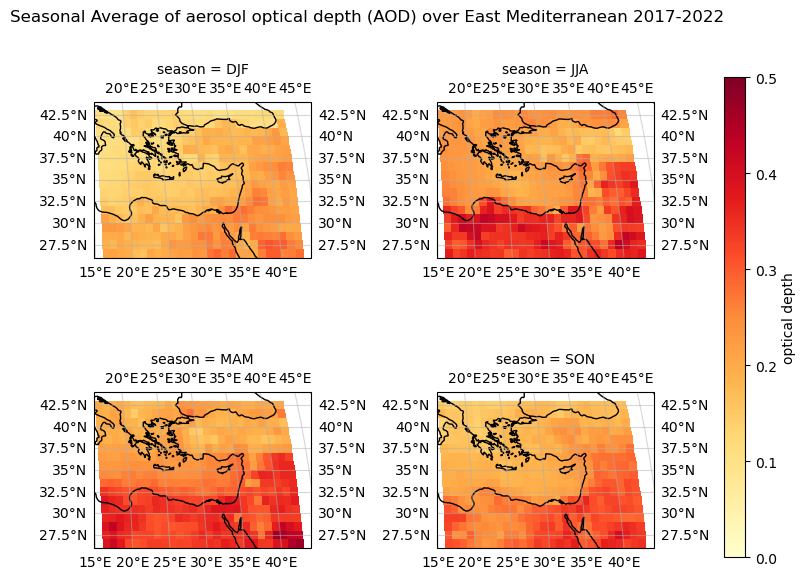

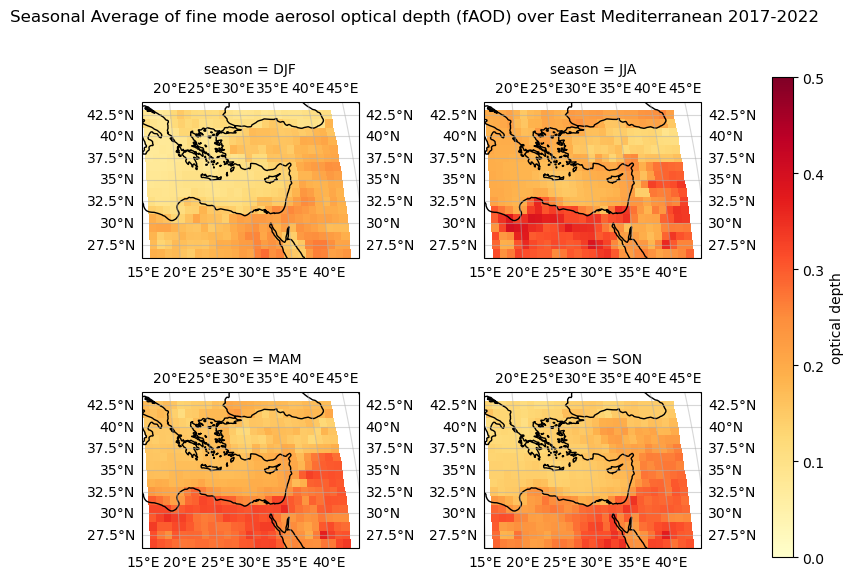

In [54]:
map_proj = ccrs.Robinson()

p = ds_seas_mereged["AOD550"].plot.pcolormesh(cmap='YlOrRd', vmax=0.5, vmin=0, col="season", col_wrap=2,
                                              transform=ccrs.PlateCarree(),
                                              subplot_kws={"projection": map_proj},
                                              add_colorbar=False)

for ax in p.axes.flat:
    ax.coastlines()

   
    ax.set_extent([16, 44, 26, 44], crs=ccrs.PlateCarree())

   
    ax.gridlines(draw_labels=True, alpha=0.5)  # Add gridlines with labels
  

cax = plt.axes([1, 0.1, 0.03, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('optical depth')
plt.title(label="Seasonal Average of aerosol optical depth (AOD) over East Mediterranean 2017-2022", x=-17, y=1.1)
plt.tight_layout()

plt.show()

#######
map_proj = ccrs.Robinson()

p = ds_seas_mereged["FM_AOD550"].plot.pcolormesh(cmap='YlOrRd', vmax=0.5, vmin=0, col="season", col_wrap=2,
                                              transform=ccrs.PlateCarree(),
                                              subplot_kws={"projection": map_proj},
                                              add_colorbar=False)

for ax in p.axes.flat:
    ax.coastlines()

   
    ax.set_extent([16, 44, 26, 44], crs=ccrs.PlateCarree())

   
    ax.gridlines(draw_labels=True, alpha=0.5) 
  

cax = plt.axes([1, 0.1, 0.03, 0.8])
cbar = plt.colorbar(mappable, cax=cax)
cbar.set_label('optical depth')
plt.title(label="Seasonal Average of fine mode aerosol optical depth (fAOD) over East Mediterranean 2017-2022", x=-17, y=1.1)
plt.tight_layout()

plt.show()



###The figures show the presence of the megacities of Cairo, Istanbul, and Athens. In order to further investigate the AOD concentration in Cairo and the surrounding area, we will plot the monthly AOD patterns of these two areas. 

###Setting up the data request and downloading the monthly average dataset for the versionsv2.1 and v2.2 and define latitude and longitude for "Cairo" and "Tanta".

In [7]:
from c3s_eqc_automatic_quality_control import download

collection_id = "satellite-aerosol-properties"
request2 = {
    "format": "zip",
    "time_aggregation": "monthly_average",
    "variable": "aerosol_optical_depth",
    "sensor_on_satellite": "slstr_on_sentinel_3a",
    "algorithm": "ens",
}

time_dict = {
       "v2.1": {"start": "2018-11", "stop": "2020-06"},
       "v2.2": {"start": "2020-07", "stop": "2022-06"},
}
lon_slicecairo= slice(31.22, 32)
lat_slicecairo = slice(29, 30.3)

lon_slicetanta= slice(30.94, 31.5)
lat_slicetanta = slice(31, 32)


##Define functions to calculate the seasonal mean of AOD and fAOD for the determined period.

In [8]:

def source_to_time_monthly(ds):
    # Naming convention: YYYYMM-*.nc
    ds["source"] = pd.to_datetime(ds["source"].str.slice(None, 6), format="%Y%m")
    return ds.rename(source="time")


def source_to_time_monthly_and_spatial_weighted_mean(ds):
    ds = ds.set_coords("source") 
    ds = utils.regionalise(ds, lon_slice=lon_slicecairo, lat_slice=lat_slicecairo)
    return diagnostics.spatial_weighted_mean(source_to_time_monthly(ds))

def source_to_time_monthly_and_spatial_weighted_mean1(ds):
    ds = ds.set_coords("source")  
    ds = utils.regionalise(ds, lon_slice=lon_slicetanta, lat_slice=lat_slicetanta)
    return diagnostics.spatial_weighted_mean(source_to_time_monthly(ds))




##Download the monthly and spatially weighted mean AOD and fAOD for Cairo.

In [9]:


ds_dictcairo = {}
for version, kwargs in time_dict.items():
    requests2 = download.update_request_date(
        request2 | {"version": version}, **kwargs, stringify_dates=True
    )
    ds_dictcairo[version] = download.download_and_transform(
        collection_id, requests2, 
    transform_func=source_to_time_monthly_and_spatial_weighted_mean,
        split_all=True,
    )

final_dataset = xr.merge(list(ds_dictcairo.values()))



100%|██████████| 730/730 [00:37<00:00, 19.65it/s]


##Download the monthly and spatially weighted mean AOD and fAOD for Tanta.

In [10]:

ds_dicttanta = {}
for version, kwargs in time_dict.items():
    requests2 = download.update_request_date(
        request2 | {"version": version}, **kwargs, stringify_dates=True
    )
    ds_dicttanta[version] = download.download_and_transform(
        collection_id, requests2, 
    transform_func=source_to_time_monthly_and_spatial_weighted_mean1,
    split_all=True,)
    

final_dataset2 = xr.merge(list(ds_dicttanta.values()))



100%|██████████| 730/730 [00:38<00:00, 18.92it/s]


 ###Visualize the results
 
 #Line plots for the spatial mean of AOD and fAOD over Cairo and Tanta for the determined period.

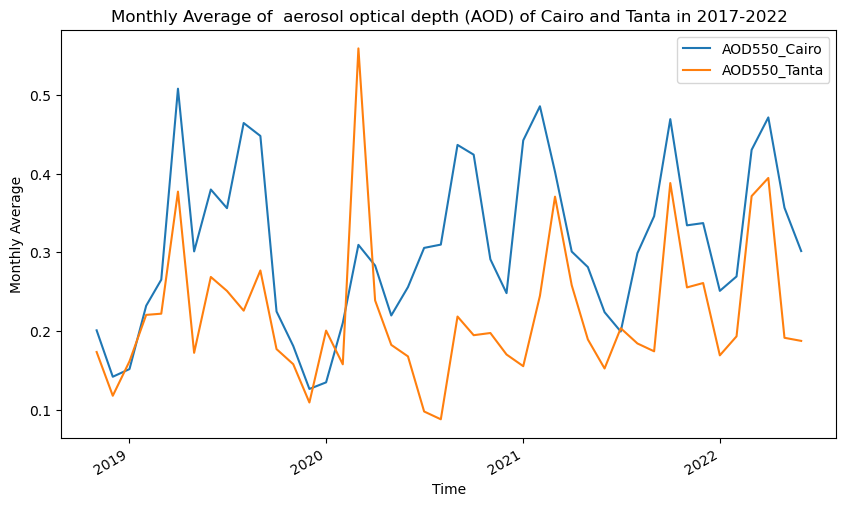

In [11]:
import matplotlib.pyplot as plt
import numpy as np
t = final_dataset["time"] 


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

y1 = final_dataset['AOD550']
plt.plot(t, y1, label="AOD550_Cairo")

y2 = final_dataset2['AOD550']
plt.plot(t, y2, label="AOD550_Tanta")

ax.set_xlabel('Time')
ax.set_ylabel('Monthly Average')
ax.set_title('Monthly Average of  aerosol optical depth (AOD) of Cairo and Tanta in 2017-2022')
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(fontsize=10)

fig.autofmt_xdate()
plt.show()

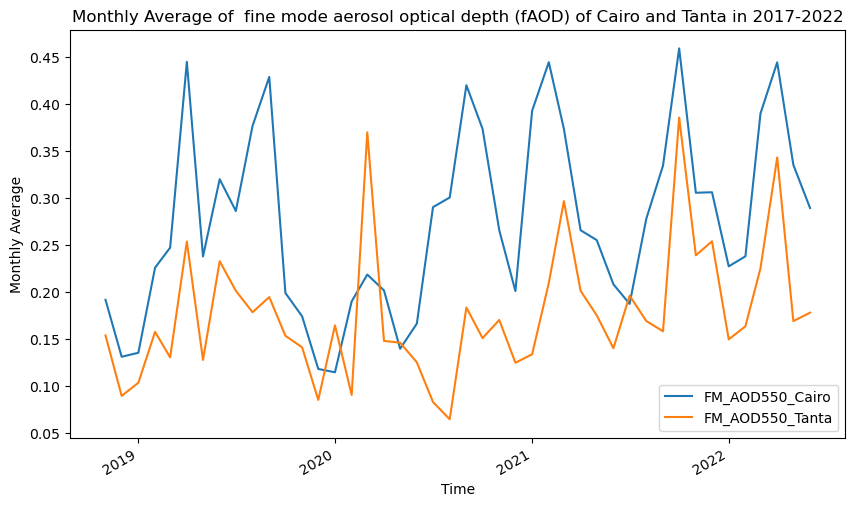

In [12]:
import matplotlib.pyplot as plt
import numpy as np
t = final_dataset["time"] 


# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

y1 = final_dataset['FM_AOD550']
plt.plot(t, y1, label="FM_AOD550_Cairo")

y2 = final_dataset2['FM_AOD550']
plt.plot(t, y2, label="FM_AOD550_Tanta")

ax.set_xlabel('Time')
ax.set_ylabel('Monthly Average')
ax.set_title('Monthly Average of  fine mode aerosol optical depth (fAOD) of Cairo and Tanta in 2017-2022')
ax.legend()

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))


plt.xticks(fontsize=10)

fig.autofmt_xdate()
plt.show()

###The spatially weighted mean timeseries of AOD and fAOD exhibit a reasonable seasonal variability, as shown by the figures. The seasonal mean maps of AOD and fAOD, which show Cairo as a megacity based on the seasonal trends from the SLSTR dataset, forecast that Cairo's monthly mean trend of AOD is larger than the Tanta trend. Our results validate Cairo's status as a megacity as reported in the literature.

1. Kanakidou, M., Mihalopoulos, N., Kindap, T., Im, U., Vrekoussis, M., Gerasopoulos, E., Dermitzaki, E., Unal, A., Koçak, M., Markakis, K. and Melas, D., 2011. Megacities as hot spots of air pollution in the East Mediterranean. Atmospheric Environment, 45(6), pp.1223-1235.
2. Marey, H.S., Gille, J.C., El-Askary, H.M., Shalaby, E.A. and El-Raey, M.E., 2011. Aerosol climatology over Nile Delta based on MODIS, MISR and OMI satellite data. Atmospheric Chemistry and Physics, 11(20), pp.10637-10648.
3. Steiner, A.L., Tawfik, A.B., Shalaby, A., Zakey, A.S., Abdel-Wahab, M.M., Salah, Z., Solmon, F., Sillman, S. and Zaveri, R.A., 2014. Climatological simulations of ozone and atmospheric aerosols in the Greater Cairo region. Climate research, 59(3), pp.207-228.